In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv") 

In [3]:
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape 

(7043, 21)

In [5]:
df.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.drop("customerID", axis="columns", inplace=True) 

In [7]:
df.head() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.dtypes 

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df['TotalCharges'] 
df.TotalCharges.values 

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
pd.to_numeric(df.TotalCharges, errors="coerce").isnull() 

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
X=df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()] 
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [13]:
df1.TotalCharges =pd.to_numeric(df1.TotalCharges)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
df1.TotalCharges.values 

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [15]:
df1.TotalCharges.dtype

dtype('float64')

In [16]:
not_left =df1[df1.Churn=="No"].tenure
left=df1[df1.Churn=="Yes"].tenure

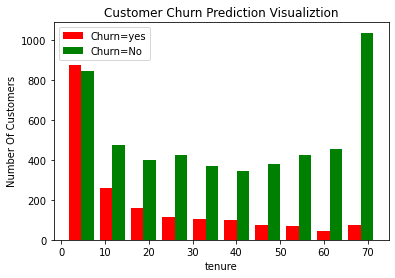

In [17]:
plt.hist([left, not_left] , color=["red", "green"], label=['Churn=yes','Churn=No'])
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()

In [18]:
not_left_ON_MC =df1[df1.Churn=="No"].MonthlyCharges
left_ON_MC =df1[df1.Churn=="Yes"].MonthlyCharges

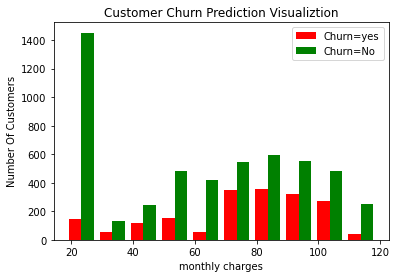

In [19]:
plt.hist([left_ON_MC, not_left_ON_MC],  color=["red", "green"], label=['Churn=yes','Churn=No'])
plt.xlabel("monthly charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()

In [21]:
for column in df:
     if df[column].dtypes=='object':
        print(f'{column}: {df[column].unique()}') 

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [22]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [23]:
 df1.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [24]:
for column in df1:
    print(f'{column}: {df1[column].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [25]:
yes_no_column=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in yes_no_column: 
    df1[i].replace({"Yes":1,"No":0}, inplace=True) 

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [26]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [27]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [28]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [30]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [31]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
X= df2.drop("Churn", axis="columns")
y=df2["Churn"]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [34]:
X_train.shape

(5625, 26)

In [35]:
y_train.shape

(5625,)

In [36]:
X_test.shape

(1407, 26)

In [37]:
import tensorflow as tf
from tensorflow import keras

In [38]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [39]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [48]:
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3532 - accuracy: 0.8325
Epoch 2/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.8352
Epoch 3/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.8370
Epoch 4/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8350
Epoch 5/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.8356
Epoch 6/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.8393
Epoch 7/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8380
Epoch 8/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8334
Epoch 9/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3493 - accuracy: 0.8366
Epoch 10/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3489 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8482
Epoch 82/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3309 - accuracy: 0.8484
Epoch 83/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8421
Epoch 84/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8496
Epoch 85/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3305 - accuracy: 0.8469
Epoch 86/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3305 - accuracy: 0.8473
Epoch 87/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3308 - accuracy: 0.8491
Epoch 88/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.8473
Epoch 89/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8462
Epoch 90/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 

176/176 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8556
Epoch 161/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8540
Epoch 162/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8519
Epoch 163/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8562
Epoch 164/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8564
Epoch 165/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8587
Epoch 166/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.8549
Epoch 167/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8580
Epoch 168/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8571
Epoch 169/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3156 - a

176/176 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.8599
Epoch 240/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3074 - accuracy: 0.8604
Epoch 241/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.8597
Epoch 242/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8628
Epoch 243/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3043 - accuracy: 0.8601
Epoch 244/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3036 - accuracy: 0.8638
Epoch 245/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3063 - accuracy: 0.8597
Epoch 246/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3032 - accuracy: 0.8604
Epoch 247/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8628: 0s - loss: 0.3010 - accuracy: 0.
Epoch 248/500
176/176 [==============================

176/176 [==============================] - 0s 1ms/step - loss: 0.2968 - accuracy: 0.8638
Epoch 319/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.8667
Epoch 320/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 0.8672
Epoch 321/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2973 - accuracy: 0.8631
Epoch 322/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2965 - accuracy: 0.8628
Epoch 323/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.8665
Epoch 324/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.8661
Epoch 325/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2938 - accuracy: 0.8676
Epoch 326/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.8608
Epoch 327/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2957 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.8674
Epoch 398/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2913 - accuracy: 0.8645
Epoch 399/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2877 - accuracy: 0.8711
Epoch 400/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.8684
Epoch 401/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2905 - accuracy: 0.8686
Epoch 402/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.8677
Epoch 403/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2903 - accuracy: 0.8690
Epoch 404/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2875 - accuracy: 0.8692
Epoch 405/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.8704
Epoch 406/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2872 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.8718
Epoch 477/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2831 - accuracy: 0.8731
Epoch 478/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2826 - accuracy: 0.8764
Epoch 479/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2840 - accuracy: 0.8700
Epoch 480/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.8734
Epoch 481/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.8764
Epoch 482/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2819 - accuracy: 0.8741
Epoch 483/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.8686
Epoch 484/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.8725
Epoch 485/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2816 - a

In [49]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.7377


[0.6761403679847717, 0.7377398610115051]

In [42]:
y_pred=model.predict(X_test)

In [43]:
y_pred.shape

(1407, 1)

In [44]:
y_prediction=[]
for i in y_pred:
    if i>0.5:
        y_prediction.append(1)
    else:
        y_prediction.append(0)
        

In [45]:
y_prediction[0:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 1]

In [373]:
y_test[0:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [46]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.64      0.52      0.57       408

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

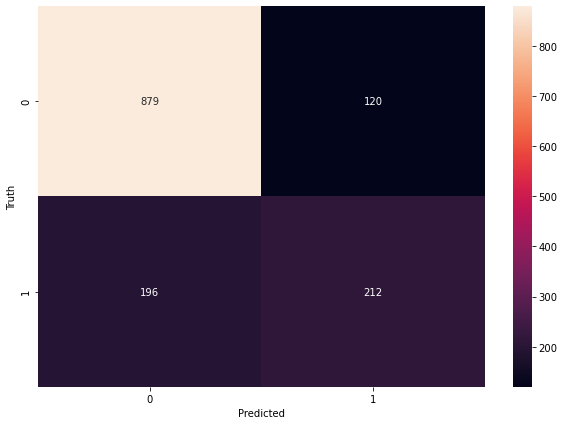

In [47]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prediction)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')